### Workflow on Scikit-Learn

In [1]:
import pandas as pd
hd = pd.read_csv("F:\Data\Datasets\csv files\heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Step1: getting data ready

In [2]:
#split the data into feature matrix and labels
#feature matrix
X = hd.drop("target", axis=1)
#labels
y = hd["target"]

#### Step2: Choosing a Machine-Learning Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
#instantiate the classifier
clf = RandomForestClassifier()

In [4]:
#these are the hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Step3: Fitting the data into the model

In [5]:
from sklearn.model_selection import train_test_split
#we divide the data into 20% test data and 80% training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#fitting the data
clf.fit(X_train,y_train)

RandomForestClassifier()

#### Step4: Make prediction

In [6]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [7]:
clf.score(X_train,y_train)

1.0

In [8]:
clf.score(X_test,y_test)

0.819672131147541

#### Step5: Evaluate the Model 

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

[[21  7]
 [ 4 29]]
0.819672131147541


#### Step6: Improving the Model 

In [10]:
#lets apply a function to check how many estimators give best accuracy
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying Model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    print(f"Model Accuracy : {clf.score(X_test,y_test)*100:.2f}%")
    print(" ")

Trying Model with 10 estimators
Model Accuracy : 86.89%
 
Trying Model with 20 estimators
Model Accuracy : 78.69%
 
Trying Model with 30 estimators
Model Accuracy : 86.89%
 
Trying Model with 40 estimators
Model Accuracy : 81.97%
 
Trying Model with 50 estimators
Model Accuracy : 80.33%
 
Trying Model with 60 estimators
Model Accuracy : 83.61%
 
Trying Model with 70 estimators
Model Accuracy : 81.97%
 
Trying Model with 80 estimators
Model Accuracy : 83.61%
 
Trying Model with 90 estimators
Model Accuracy : 86.89%
 


In [11]:
import pandas as pd
p = pd.Series(range(10,100,10))
p

0    10
1    20
2    30
3    40
4    50
5    60
6    70
7    80
8    90
dtype: int64

In [17]:
df = pd.DataFrame(p,columns = ['No. of Parameters'])
df.index.name = 'Sl No'
acc =[]
for i in range(10,100,10):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    acc.append(round(clf.score(X_test,y_test)*100,2))
    
df["Accuracy"] = acc
df


,No. of Parameters,Accuracy
Sl No,,
0,10,85.25
1,20,86.89
2,30,83.61
3,40,85.25
4,50,81.97
5,60,86.89
6,70,85.25
7,80,77.05
8,90,80.33


[Text(0.5, 1.0, 'No. of Estimators VS Accuracy'),
 Text(0.5, 0, 'Estimators Count'),
 Text(0, 0.5, 'Accuracy')]

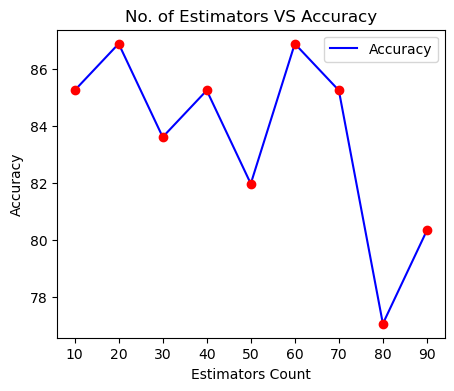

In [38]:
#plotting Params VS Accuracy
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,4))

df.plot(kind="line",
       x="No. of Parameters",
       y="Accuracy",
       ax = ax,
       cmap = "winter")

# Mark the y-axis points with a different color
ax.scatter(df["No. of Parameters"], df["Accuracy"], color='red', zorder=5)


ax.set(title="No. of Estimators VS Accuracy",
       xlabel="Estimators Count",
       ylabel="Accuracy")